# INTRODUCTION:
Here are some notes and comments about this datasets : This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’

# The questions about this dataset:
Which company and merchant had the highest revenue? (performance tracking)
Which merchant had the hightest transactions in a month
Customer's Region Analysis (which country do the top custoemrs reside in)
Most preferred payment methods by customers and deep dive to see the most used scheme of card used
Analysis using Authentication Rate
Fraud transaction Analysis

In [1]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("APAC Data Analytics Case Study.csv")

# Exploring Data Set
1. Looking at the head of the data and checkinng for the data types and Null value.
2. Replacing Null value with appropriate value.
3. Removing columns that would not be required for the Analysis

In [3]:
df.head()

,Unnamed: 0,pspreference,currencycode,issuercountrycode,bin,creationdate,genericresponse,amount,scheme,merchant,company,acquireraccount,acquirer,journaltype,paymentmethod,approved,refused,received,threedattempt
0,1,psp:89068059460259968,IDR,ID,552695,2017-10-01 18:58:11,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,1,Yes
1,2,psp:67025064257904888,IDR,ID,547582,2017-10-01 12:47:47,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,1,Yes
2,3,psp:61362098320387304,IDR,ID,547582,2017-10-01 22:44:06,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes
3,4,psp:78486269968561824,IDR,ID,547582,2017-10-01 22:41:30,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes
4,5,psp:6116164638660848,IDR,KR,558420,2017-10-01 21:56:04,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,1,Yes


In [4]:
df.shape

(226868, 19)

In [5]:
df.describe()

,Unnamed: 0,bin,amount,approved,refused,received
count,226868.000000,226868.000000,226868.000000,226868.000000,226868.000000,226868.0
mean,113434.500000,491153.083432,9153.459205,0.882275,0.117725,1.0
std,65491.294773,50233.273537,22858.245377,0.322283,0.322283,0.0
min,1.000000,400000.000000,10.000000,0.000000,0.000000,1.0
25%,56717.750000,450824.000000,1000.000000,1.000000,0.000000,1.0
50%,113434.500000,498001.000000,1900.000000,1.000000,0.000000,1.0
75%,170151.250000,540912.000000,7500.000000,1.000000,0.000000,1.0
max,226868.000000,591882.000000,900000.000000,1.000000,1.000000,1.0


In [6]:
df.dtypes

Unnamed: 0             int64
pspreference          object
currencycode          object
issuercountrycode     object
bin                    int64
creationdate          object
genericresponse       object
amount               float64
scheme                object
merchant              object
company               object
acquireraccount       object
acquirer              object
journaltype           object
paymentmethod         object
approved               int64
refused                int64
received               int64
threedattempt         object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0             0
pspreference           0
currencycode           0
issuercountrycode    232
bin                    0
creationdate           0
genericresponse        0
amount                 0
scheme                 0
merchant               0
company                0
acquireraccount        0
acquirer               0
journaltype            0
paymentmethod          0
approved               0
refused                0
received               0
threedattempt          0
dtype: int64

In [8]:
# drop unuseful columns 
df.drop(['Unnamed: 0','pspreference','bin', 'received'],axis=1,inplace=True)

In [9]:
df.nunique()

currencycode              4
issuercountrycode       117
creationdate         192593
genericresponse          14
amount                 2007
scheme                    2
merchant                 10
company                   3
acquireraccount          23
acquirer                  7
journaltype              14
paymentmethod            18
approved                  2
refused                   2
threedattempt             2
dtype: int64

In [10]:
# Handlilng missing data for issuercountrycode
# Using string "missing" to replace all NUll values
df['issuercountrycode'].fillna('missing',inplace=True )

In [11]:
# confirm the data 
df.isnull().sum()

currencycode         0
issuercountrycode    0
creationdate         0
genericresponse      0
amount               0
scheme               0
merchant             0
company              0
acquireraccount      0
acquirer             0
journaltype          0
paymentmethod        0
approved             0
refused              0
threedattempt        0
dtype: int64

In [12]:
#checking for duplicates
df.duplicated().sum()

52

<AxesSubplot:>

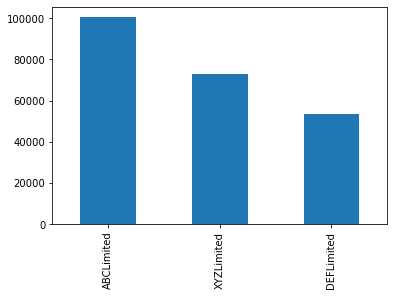

In [13]:
df.company.value_counts().plot(kind='bar')

#1. Which merchant had the hightest transactions in a month ---- Ans. ABC_IDR

<AxesSubplot:>

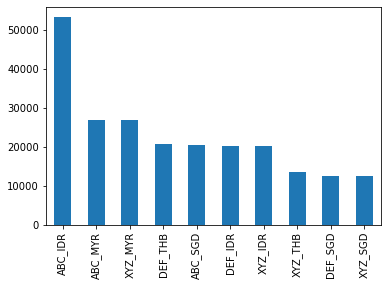

In [14]:

df.merchant.value_counts().plot(kind='bar')

In [15]:
# Checking the revenue for the merchant 
df.groupby('merchant').amount.sum().sort_values(ascending=False)

merchant
ABC_IDR    930063077.0
XYZ_IDR    324395600.0
DEF_IDR    321082949.0
DEF_THB    181587500.0
XYZ_THB    136666917.0
ABC_SGD     60558012.0
DEF_SGD     37632294.0
XYZ_SGD     37423490.0
ABC_MYR     23981237.0
XYZ_MYR     23235907.0
Name: amount, dtype: float64

In [16]:
# The above is misleading because of amount received in different currency
#Let us try to covert the amount in common currency for comparision
cur_change = {'currencycode':['IDR','TBH','SGD','MYR'],'onedollar':[0.000067,0.028,0.72,0.22]}

In [17]:
df_curr= pd.DataFrame(cur_change)

In [18]:
df_curr

,currencycode,onedollar
0,IDR,0.000067
1,TBH,0.028000
2,SGD,0.720000
3,MYR,0.220000


In [19]:
df = df.merge(df_curr, on='currencycode', how='left')

In [20]:
df['amount_USD']= df['amount'] * df['onedollar']

In [21]:
df.head()

,currencycode,issuercountrycode,creationdate,genericresponse,amount,scheme,merchant,company,acquireraccount,acquirer,journaltype,paymentmethod,approved,refused,threedattempt,onedollar,amount_USD
0,IDR,ID,2017-10-01 18:58:11,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,Yes,0.000067,0.067
1,IDR,ID,2017-10-01 12:47:47,APPROVED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Cancelled,commercialcredit,1,0,Yes,0.000067,0.067
2,IDR,ID,2017-10-01 22:44:06,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,Yes,0.000067,0.067
3,IDR,ID,2017-10-01 22:41:30,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,Yes,0.000067,0.067
4,IDR,KR,2017-10-01 21:56:04,NOT_3D_AUTHENTICATED,1000.0,mastercard,ABC_IDR,ABCLimited,AdyenMasterCardMalaysia_ABC_IDR,AdyenMasterCardMalaysia,Refused,commercialcredit,0,1,Yes,0.000067,0.067


#2.WWhich company and merchant had the highest revenue? (performance tracking)

In [22]:
#Now let us checking the revenue for the merchant in USD
df.groupby('merchant').amount_USD.sum().round().sort_values(ascending=False)

##WE CAN SEE THAT ABC_SGD HAS THE HIGHEST REVENUE

merchant
ABC_SGD    43601769.0
DEF_SGD    27095252.0
XYZ_SGD    26944913.0
ABC_MYR     5275872.0
XYZ_MYR     5111900.0
ABC_IDR       62314.0
XYZ_IDR       21735.0
DEF_IDR       21513.0
DEF_THB           0.0
XYZ_THB           0.0
Name: amount_USD, dtype: float64

In [23]:
#3.Customer's Region Analysis (which country do the top custoemrs reside in?)

In [24]:

df.issuercountrycode.value_counts().head(5)

# TOP 5 COUNTRIES OF MOST CUSTOMERS

ID    86592
MY    48873
SG    41967
TH    27762
US     5527
Name: issuercountrycode, dtype: int64

In [25]:
df.groupby(['merchant','issuercountrycode']).amount.count().sort_values(ascending=False).head(20)

#MERCHANT ABC_IDR HAS HIGHEST TRANSACTIONS BY PEOPLE RESIDING IN Indonasia
# CAN SEE THAT MERCHANT IS GETTING HIGHEST TRANSACTION FROM ITS OWN COUNTRY PEOPLE

merchant  issuercountrycode
ABC_IDR   ID                   47771
ABC_MYR   MY                   22238
XYZ_MYR   MY                   22181
DEF_IDR   ID                   18731
XYZ_IDR   ID                   18663
ABC_SGD   SG                   16772
DEF_THB   TH                   15520
XYZ_THB   TH                   11428
DEF_SGD   SG                   11074
XYZ_SGD   SG                   11048
ABC_SGD   MY                    1414
ABC_IDR   US                    1362
DEF_THB   US                    1099
ABC_IDR   SG                     736
          MY                     709
XYZ_MYR   SG                     701
ABC_MYR   SG                     678
          US                     676
XYZ_MYR   US                     626
XYZ_THB   US                     600
Name: amount, dtype: int64

In [26]:
df_ABC_IDR =df[df['merchant']=='ABC_IDR']

<AxesSubplot:>

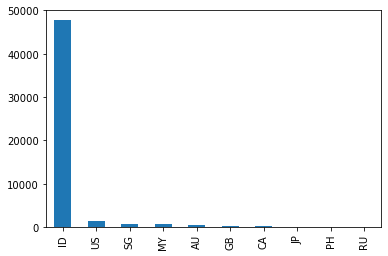

In [27]:
df_ABC_IDR.issuercountrycode.value_counts().head(10).plot(kind='bar')

# 4.Most preferred payment methods by customers and deep dive to see the most used scheme of card used
#Ans: premiumcredit, standardcredit and standard debit are the most used payment methods for 10 merchants with VISA used 
#preferrably as a 
#card network shceme

<AxesSubplot:>

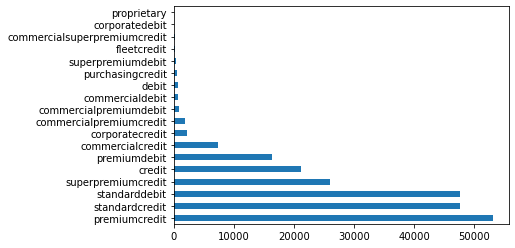

In [28]:
df.paymentmethod.value_counts().plot(kind='barh')

In [29]:
df.scheme.value_counts()

visa          114033
mastercard    112835
Name: scheme, dtype: int64

In [30]:
#Also look at the cards with highest trsactions amount
df.groupby('paymentmethod').amount_USD.agg(['sum','max']).round().sort_values(by='sum',ascending=False)

# premiumcredit and standarddebit were used widely by customers to make huge payments to merchants

,sum,max
paymentmethod,,
premiumcredit,31266262.0,61704.0
standarddebit,18033529.0,36000.0
standardcredit,17274880.0,71928.0
premiumdebit,16731390.0,39600.0
superpremiumcredit,16321884.0,59400.0
credit,3565857.0,71928.0
commercialcredit,1683971.0,7200.0
commercialpremiumcredit,740406.0,21600.0
corporatecredit,713512.0,7200.0


In [31]:
df.groupby(['merchant','paymentmethod']).amount_USD.agg(['sum','max']).round().sort_values(by='max',ascending=False).head(5)
# IT'S INTERESTING TO NOTE THAT SINGAPORE MERCHANTS HAVE THE HIGHEST AMOUNT TRANSACTED(USD 71928) FOR THIER PRODUCTS
#IF IT IS A HIGH AMOUNT OF PAYMENT CUSTOMERS TRUST credit and staadartcredit and premiumcredit for payments

,,sum,max
merchant,paymentmethod,,
DEF_SGD,credit,330598.0,71928.0
ABC_SGD,credit,1329597.0,71928.0
DEF_SGD,standardcredit,4901404.0,71928.0
ABC_SGD,standardcredit,6536544.0,64800.0
XYZ_SGD,premiumcredit,8937732.0,61704.0


In [32]:
df.groupby(['merchant','issuercountrycode','paymentmethod']).amount_USD.agg(['sum','max']).round().sort_values(by='max',ascending=False).head(5)
#POINT TO NOTE: CUSTOMER WHO MADE PAYMENT USING CREDIT HAS NO ISSUERCCOUNTRYCODE. SAME AMOUNT HAS BEEN TRANSACTED FOR DEF_SGD AND ABC_SGD

sum      max
merchant issuercountrycode paymentmethod                     
DEF_SGD  missing           credit           118296.0  71928.0
         US                standardcredit   110063.0  71928.0
ABC_SGD  missing           credit           267336.0  71928.0
DEF_SGD  SG                standardcredit  4204040.0  64800.0
ABC_SGD  VE                standardcredit    64800.0  64800.0

In [33]:
#6. Fraud transaction Analysis
df['Fraudulant_trans'] = df['genericresponse'].apply(lambda x: 'Fraud' if x == 'FRAUD' else 'Not Fraud')

Fraud_count = df.Fraudulant_trans.value_counts()
Fraud_count

Not Fraud    208680
Fraud         18188
Name: Fraudulant_trans, dtype: int64

<AxesSubplot:ylabel='Fraudulant_trans'>

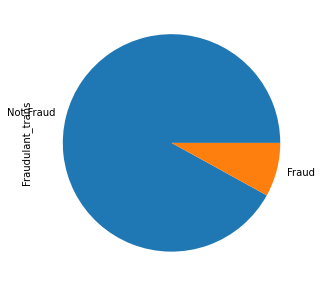

In [34]:
#Fraudulant transactions in data are 18188

Fraud_count.plot(kind='pie',figsize=(5,5))

In [35]:
grouped = df.groupby(['Fraudulant_trans','issuercountrycode']).amount.count().sort_values(ascending=False).head(5)

In [36]:
grouped

Fraudulant_trans  issuercountrycode
Not Fraud         ID                   76412
                  MY                   47207
                  SG                   38788
                  TH                   27435
Fraud             ID                   10180
Name: amount, dtype: int64

# TOP 5 COUNTRIES OF CUSTOMER INVOLVED IN FRAUD TRANSACTIONS(Hightest in Indonasia)

In [37]:
df.groupby(['issuercountrycode']).apply(lambda x: x[x['Fraudulant_trans'] == 'Fraud']['amount'].count()).sort_values(ascending=False).head(5)

issuercountrycode
ID    10180
SG     3179
MY     1666
US     1600
TH      327
dtype: int64

In [38]:
type(grouped)

pandas.core.series.Series

In [39]:
grouped['Fraud']

issuercountrycode
ID    10180
Name: amount, dtype: int64

In [40]:
grouped_test=df.groupby(['Fraudulant_trans','merchant','issuercountrycode','paymentmethod']).amount.count().sort_values(ascending=False)

In [41]:
# standarddebit is used the most by Indonasian customers that had their transactions rendered FRAUD(IDR merchants most attacked)
grouped_test['Fraud']

merchant  issuercountrycode  paymentmethod   
ABC_IDR   ID                 standarddebit       2360
DEF_IDR   ID                 standarddebit       1425
XYZ_IDR   ID                 standarddebit       1408
ABC_IDR   ID                 standardcredit      1209
                             premiumdebit         985
                                                 ... 
XYZ_IDR   SG                 premiumdebit           1
          SM                 commercialcredit       1
          TC                 standardcredit         1
          TR                 standardcredit         1
          TW                 premiumcredit          1
Name: amount, Length: 530, dtype: int64

# AUTHENTICATION RATE ANLAYSIS

In [49]:

df['Auth_Rate'] = (df.approved/df.approved.count())*100

In [50]:
df['Auth_Rate']

0         0.000004
1         0.000004
2         0.000000
3         0.000000
4         0.000000
            ...   
226863    0.000000
226864    0.000000
226865    0.000000
226866    0.000000
226867    0.000000
Name: Auth_Rate, Length: 226868, dtype: float64

In [46]:
Auth_Rate

88.22751555970872

In [53]:
df.groupby('issuercountrycode').Auth_Rate.mean()

issuercountrycode
AD         0.000000e+00
AE         3.951865e-06
AF         4.407849e-06
AG         4.407849e-06
AM         4.407849e-06
               ...     
VE         0.000000e+00
VN         3.563060e-06
ZA         4.087279e-06
ZM         4.407849e-06
missing    3.799870e-08
Name: Auth_Rate, Length: 118, dtype: float64